In [46]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import os
# import io
from skimage import io

In [24]:
pp = cv2.imread('results.jpg')

In [34]:
results = np.load('results.npy', allow_pickle=True)

In [31]:
ann_file = "/root/autodl-tmp/pannuke_app/datasets/processed/PanNuke/test/test_annotations.json"
coco_api = COCO(ann_file)

loading annotations into memory...
Done (t=0.66s)
creating index...
index created!


In [36]:
pred = coco_api.loadRes(results.tolist())

Loading and preparing results...
DONE (t=0.12s)
creating index...
index created!


In [38]:
coco = pred

In [45]:
annIds

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

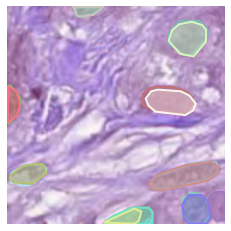

In [71]:
# 加载并打印该照片包含的语义分析数据
imgIds = coco.getImgIds(imgIds=[1])  # 给定参数img_id和cat_id，返回list of对应的所有img_id和包含了指定cat_id的所有img_id
img = coco.loadImgs(imgIds)[0] # l
annIds = coco.getAnnIds(imgIds=img['id'])
anns = coco.loadAnns(annIds)
img_path = os.path.join(r"/root/autodl-tmp/pannuke_app/datasets/processed/PanNuke/test/imgs/", img["file_name"])
I = io.imread(img_path)
# I = io.imread(img["coco_url"])
plt.axis('off');
plt.imshow(I);
coco.showAnns(anns)

imgIds = coco_api.getImgIds(imgIds=[1])  # 给定参数img_id和cat_id，返回list of对应的所有img_id和包含了指定cat_id的所有img_id
img = coco_api.loadImgs(imgIds)[0] # l
annIds = coco_api.getAnnIds(imgIds=img['id'])
ann_apis = coco_api.loadAnns(annIds)

coco_api.showAnns(ann_apis)
# plt.imshow(I)
# plt.axis('off'); plt.show()

In [63]:
I.shape

(256, 256, 3)

In [79]:
from pycocotools import mask

In [80]:
mask.toBbox(ann['segmentation'])

array([115., 237.,  56.,  19.])

In [82]:
for ann in ann_apis:
    print(ann['category_id'])
    print(ann['id'])
    print(ann['bbox'])
    print(ann['segmentation'])
    print(mask.toBbox(ann['segmentation']))
# 我觉得可能是格式的问题

3
1
[167.0, 183.0, 82.0, 33.0]
{'size': [256, 256], 'counts': b'`nY12m72N2N3M2M3N1O1O1O1O10000O10000O10000O01000O1000O010000O01000O100O01000O1000O0100000O010000000O1000O10O100000000O10O1000O100000000O0100000O1O1O100O2N1O2N2N2O0O2N2JXb1'}
[167. 183.  82.  33.]
1
2
[190.0, 18.0, 45.0, 41.0]
{'size': [256, 256], 'counts': b'Ua_14i74L4L4N3M2N2N2O1N2N3M2N2O1O00000O101O00000O101O000000000001N1N2O2N1O1O2M2O1O2N2N2M4M2NV_5'}
[190.  18.  44.  40.]
1
3
[163.0, 98.0, 59.0, 30.0]
{'size': [256, 256], 'counts': b'[kX13k75L4L2M3N2N101O1O1N2O1O000000000000001O000000000001O0001O000000000000001O000001O00001O0010OO2O0O2O0O2N2O2M2O1N2M4Kbd8'}
[163.  98.  58.  30.]
1
4
[206.0, 221.0, 33.0, 35.0]
{'size': [256, 256], 'counts': b'Xgc18f7:F4M2M3N2M3O1O1O0000000000000000000000000001O1O1O1O1O1N2M8I8G8IYP4'}
[206. 222.  33.  34.]
3
5
[3.0, 185.0, 43.0, 24.0]
{'size': [256, 256], 'counts': b'Vn06j70O2N2N2O0O1O1O100O1O1O100O2N10000000000O1000001OO00100O1O100O1O1O101N1O100O1O3M5LPbd1'}
[  3. 185.  42.  24.]
1
6
[2

In [81]:
for ann in anns:
    print(ann['category_id'])
    print(ann['id'])
    print(ann['bbox'])
    print(ann['segmentation'])
    print(mask.toBbox(ann['segmentation']))
# 我觉得可能是格式的问题

1.0
1
[246.4399   234.60342   18.910553  36.085648]
{'size': [256, 256], 'counts': b'o^k1b0]73M2N2N2N2O1N2O1O001O1O001O00000000OXI'}
[237. 217.  19.  36.]
1.0
2
[221.65768  237.79878   31.53334   35.665527]
{'size': [256, 256], 'counts': b'Sgc1c0\\72M4N1N2N2N2O1N2O1O000000000000000001O001O1O001O1N2M3N3M3M4L5KcX4'}
[206. 220.  32.  36.]
1.0
3
[  7.146358 114.92808   14.21976   45.0728  ]
{'size': [256, 256], 'counts': b'm:\\1d6O1O2N2N2N2N2M3N2N3L3N3L4KhTl1'}
[ 1. 93. 14. 44.]
1.0
4
[212.46558   36.333904  45.19278   40.380737]
{'size': [256, 256], 'counts': b'n`_1>a71O2N2M3N2N2N1O2N2N1O2N2O1O1O001O1O000000000000000000O1O1O1O1O1O1N2O1O1O2N2N2N2N2N2N3L3N2MWo4'}
[190.  17.  46.  40.]
1.0
5
[188.8717   109.801636  58.05957   32.09983 ]
{'size': [256, 256], 'counts': b'VSX1>a72N1O2O0O2O0O2O0O2O0O2O0O2O00001O000000000000000000000000001O0000010O0001O00001O00001O000O2O0O2N101N2N2N1O2O1N2M3Nf\\9'}
[160.  94.  58.  32.]
1.0
6
[96.37546    5.7268825 33.27581   11.370711 ]
{'size': [256, 256], 'cou

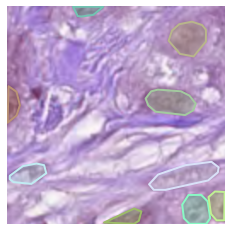

In [66]:
# 加载并打印该照片包含的语义分析数据
imgIds = coco_api.getImgIds(imgIds=[1])  # 给定参数img_id和cat_id，返回list of对应的所有img_id和包含了指定cat_id的所有img_id
img = coco_api.loadImgs(imgIds)[0] # l
annIds = coco_api.getAnnIds(imgIds=img['id'])
anns = coco_api.loadAnns(annIds)
img_path = os.path.join(r"/root/autodl-tmp/pannuke_app/datasets/processed/PanNuke/test/imgs/", img["file_name"])
I = io.imread(img_path)
# I = io.imread(img["coco_url"])
plt.axis('off');
plt.imshow(I);
coco.showAnns(anns)
# plt.imshow(I)
# plt.axis('off'); plt.show()

In [61]:
I.shape

(256, 256, 3)

In [72]:
coco_eval = COCOeval(coco_api, coco, iouType="segm")

In [73]:
for ann in anns:
    print(ann['category_id'])
    print(ann['id'])
    print(ann['bbox'])

1.0
1
[246.4399   234.60342   18.910553  36.085648]
1.0
2
[221.65768  237.79878   31.53334   35.665527]
1.0
3
[  7.146358 114.92808   14.21976   45.0728  ]
1.0
4
[212.46558   36.333904  45.19278   40.380737]
1.0
5
[188.8717   109.801636  58.05957   32.09983 ]
1.0
6
[96.37546    5.7268825 33.27581   11.370711 ]
3.0
7
[208.50873  198.62192   78.65654   31.869034]
3.0
8
[188.19443  109.93956   57.936554  31.864738]
3.0
9
[ 24.54151 197.6994   42.38431  24.64743]
3.0
10
[142.3378   245.96158   55.808052  19.897263]
1.0
11
[142.37762  246.0533    56.19771   19.707214]


In [74]:
coco_eval.params.imgIds = [1]

In [75]:
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.620
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.917
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.777
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.608
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.800
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.217
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.675
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.675
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.613
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=10

In [29]:
results

array([{'bbox': array([246.4399  , 234.60342 ,  18.910553,  36.085648], dtype=float32), 'category_id': 1.0, 'score': 0.8170118, 'image_id': 1, 'segmentation': [[255.0, 252.5, 254.0, 252.5, 253.0, 252.5, 252.0, 252.5, 251.0, 252.5, 250.0, 252.5, 249.5, 252.0, 249.0, 251.5, 248.0, 251.5, 247.5, 251.0, 247.0, 250.5, 246.5, 250.0, 246.0, 249.5, 245.0, 249.5, 244.5, 249.0, 244.0, 248.5, 243.5, 248.0, 243.0, 247.5, 242.5, 247.0, 242.0, 246.5, 241.5, 246.0, 241.0, 245.5, 240.5, 245.0, 240.0, 244.5, 239.5, 244.0, 239.0, 243.5, 238.5, 243.0, 238.0, 242.5, 237.5, 242.0, 237.5, 241.0, 237.0, 240.5, 236.5, 240.0, 236.5, 239.0, 236.5, 238.0, 236.5, 237.0, 236.5, 236.0, 236.5, 235.0, 236.5, 234.0, 236.5, 233.0, 236.5, 232.0, 236.5, 231.0, 236.5, 230.0, 236.5, 229.0, 236.5, 228.0, 236.5, 227.0, 236.5, 226.0, 236.5, 225.0, 236.5, 224.0, 236.5, 223.0, 237.0, 222.5, 238.0, 222.5, 238.5, 222.0, 239.0, 221.5, 239.5, 221.0, 240.0, 220.5, 240.5, 220.0, 241.0, 219.5, 241.5, 219.0, 242.0, 218.5, 242.5, 218.0,

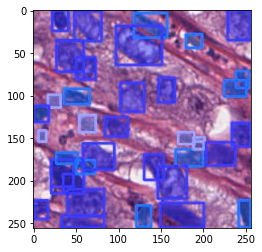

In [25]:
plt.imshow(pp)

In [12]:
mask = np.load('binary_mask1.npy')

In [13]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

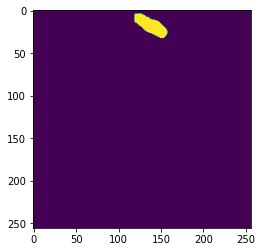

In [14]:
plt.imshow(mask)

In [ ]:
re

In [19]:
img_path = "/root/autodl-tmp/pannuke_app/datasets/processed/PanNuke/test/imgs/test_1470.png"

In [20]:
inst_path = img_path.replace("imgs",'inst').replace("png",'npy')

In [21]:
inst = np.load(inst_path)

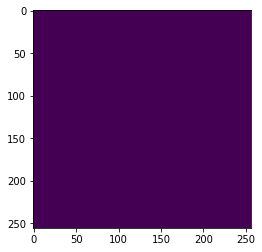

In [22]:
plt.imshow(inst)